#Kaggle_SpaceTitanic_20221109_3.ipynb
##coded by JJ Chen, Taiwan

Ref : https://github.com/team-pass-ds/Spaceship-Titanic/blob/master/notebooks/mukhopadhyay-eda-notebook.ipynb

In [70]:
# Built-in imports
import warnings
from typing import List, Tuple, Dict

# warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as exp
import matplotlib.pyplot as plt

from IPython.display import Markdown, display
sns.set_style('white')
MODE: str = 'G'

In [71]:
# Reading the dataset
df = pd.read_csv("../input/spaceship-titanic/train.csv")
num = df.shape

df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [73]:
# Functions definite with analysis

def exp_countplot(column: str) -> pd.DataFrame:
    temp = df.groupby(column).size().reset_index(name='Counts')
    fig = px.bar(temp, x=column, y='Counts', title=f'Countplot of {column}'); fig.show()
    return temp

def sns_countplot(column: str, **kwargs) -> None:
    sns.countplot(x=df[column], **kwargs)
    plt.title(f'Countplot of {column}', **kwargs); plt.ylabel('Counts')
    plt.show()

def exp_histplot(column: str, nbins=30) -> pd.DataFrame:
    fig = px.histogram(df, x=column, nbins=nbins, title=f'Distribution of {column}')
    fig.update_layout(bargap=0.1); fig.show()

def sns_histplot(column: str, type='hist', **kwargs) -> None:
    if type == 'hist':
        sns.histplot(x=df[column], color='red', kde=True, **kwargs)
    else:
        sns.distplot(a=df[column], color='red', **kwargs)
    plt.title(f'Distribution of {column}'); plt.show()

In [74]:
# PassengerId
df.PassengerId.head()

0    0001_01
1    0002_01
2    0003_01
3    0003_02
4    0004_01
Name: PassengerId, dtype: object

# Pre-Feature Engineering

In [75]:
# Splitting PassengerId into GroupId and PassengerId

df['GroupId'] = df.PassengerId.apply(lambda x: x.split('_')[0])
df['PassengerId'] = df.PassengerId.apply(lambda x: x.split('_')[0])
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId
0,0001,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001
1,0002,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002
2,0003,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003
3,0003,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003
4,0004,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276
8689,9278,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278
8690,9279,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279
8691,9280,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280


['Europa' 'Earth' 'Mars' nan]


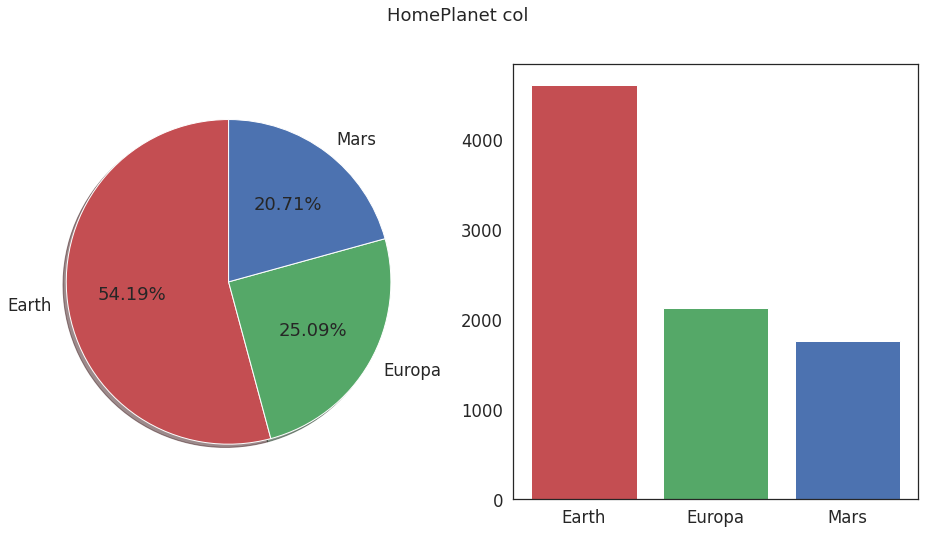

In [76]:
# 'HomePlanet' col data
print(df['HomePlanet'].unique())

t = df.HomePlanet.value_counts()
labels, sizes = t.index, t.to_list()

_,fig1 = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

fig1[0].pie(sizes, labels=labels, autopct='%.2f%%', 
          shadow=True, startangle=90, colors=['r', 'g', 'b'])
# explode = (0, 0.1, 0)
fig1[1].bar(labels, sizes, color=['r', 'g', 'b'])

plt.suptitle('HomePlanet col',fontsize=18)
# plt.legend(loc='best')
plt.show()

In [77]:
# Cabins
print(df['Cabin'],end='\n\n')

# Splitting 'deck' to num and side
decks, nums, sides = [], [], []
lists = [decks, nums, sides]
for _, row in df.iterrows():
    if pd.isna(row.Cabin):
        for l in lists:
            l.append(np.nan)
    else:
        x = row.Cabin.split('/')
        for i, l in enumerate(lists):
            l.append(x[i])

df['Deck'] = decks
df['Num'] = nums
df['Side'] = sides

# Typecasting num values to int wherever possible, else keeping nan
df['Num'] = df.Num.apply(lambda x: int(x) if not pd.isna(x) else np.nan)

print('Deck\n',df['Deck'],end='\n\n\n')
print('Side\n',df['Side'],end='\n\n\n')
print('Num\n',df['Num'])


0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 8693, dtype: object

Deck
 0       B
1       F
2       A
3       A
4       F
       ..
8688    A
8689    G
8690    G
8691    E
8692    E
Name: Deck, Length: 8693, dtype: object


Side
 0       P
1       S
2       S
3       S
4       S
       ..
8688    P
8689    S
8690    S
8691    S
8692    S
Name: Side, Length: 8693, dtype: object


Num
 0          0.0
1          0.0
2          0.0
3          0.0
4          1.0
         ...  
8688      98.0
8689    1499.0
8690    1500.0
8691     608.0
8692     608.0
Name: Num, Length: 8693, dtype: float64


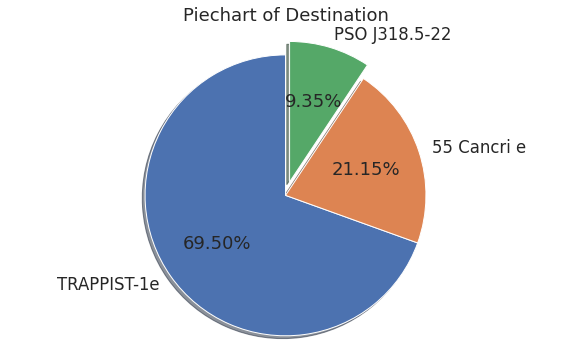

In [78]:
# Destination
# The planet the passenger will be debarking to.

t = df.Destination.value_counts()
labels, sizes = t.index, t.to_list()
explode = (0, 0, 0.1)

plt.figure(figsize=(10, 6))
plt.pie(sizes, explode=explode, labels=labels, autopct='%.2f%%', 
        shadow=True, startangle=90)
plt.axis('equal')
plt.title('Piechart of Destination')
plt.show()

In [79]:
# Missing Value Analysis
# Finding percentages of nulls 

strings = [
    '|#|Col|Nulls Percent * |Types|',
    '|:|:-------|:-----------------|:---|'
]
for idx, col in enumerate(df.columns, start=1):
    missing_col = df[pd.isna(df[col])]
    strings.append('|{}|{}|{}%|`{}`|'.format(
        idx, col, round((missing_col.shape[0] / num[0]) * 100, 3),
        'Continuous' if df[col].nunique() > 10 else 'Categorical'
    ))

display(Markdown('\n'.join(strings)))


|#|Col|Nulls Percent * |Types|
|:|:-------|:-----------------|:---|
|1|PassengerId|0.0%|`Continuous`|
|2|HomePlanet|2.312%|`Categorical`|
|3|CryoSleep|2.496%|`Categorical`|
|4|Cabin|2.289%|`Continuous`|
|5|Destination|2.094%|`Categorical`|
|6|Age|2.059%|`Continuous`|
|7|VIP|2.335%|`Categorical`|
|8|RoomService|2.082%|`Continuous`|
|9|FoodCourt|2.105%|`Continuous`|
|10|ShoppingMall|2.393%|`Continuous`|
|11|Spa|2.105%|`Continuous`|
|12|VRDeck|2.163%|`Continuous`|
|13|Name|2.301%|`Continuous`|
|14|Transported|0.0%|`Categorical`|
|15|GroupId|0.0%|`Continuous`|
|16|Deck|2.289%|`Categorical`|
|17|Num|2.289%|`Continuous`|
|18|Side|2.289%|`Categorical`|

#Feature Engineering 1 : for LastName

In [80]:
def get_last_name(name: str) -> str:
    if pd.isna(name): return ''
    else: return name.split(' ')[1]

df['LastName'] = df.Name.apply(lambda x: get_last_name(x))
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,Deck,Num,Side,LastName
0,0001,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,B,0.0,P,Ofracculy
1,0002,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,F,0.0,S,Vines
2,0003,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,A,0.0,S,Susent
3,0003,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,A,0.0,S,Susent
4,0004,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,F,1.0,S,Santantines


# DataTypes transform GroupId to int

In [81]:
df.GroupId = df.GroupId.apply(lambda x: int(x))

In [82]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error

def get_encoder_dictionary(df: pd.DataFrame, encode_cols: List[str], **kwargs) -> Dict[str, LabelEncoder]:
    encoders: Dict[str, LabelEncoder] = {}
    
    # For every column we're fitting the encoder
    # with all non null values and save it in the
    # encoders dictionary with the key `column`
    for column in encode_cols:
        l = LabelEncoder(**kwargs)
        non_null_values: List[Any] = df[~pd.isna(df[column])][column].tolist()
        l.fit(non_null_values)
        encoders[column] = l
    
    return encoders

def test_model(X, y, model, type_, target, ax):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    if type_ == 'C':
        sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='.0f', 
                    ax=ax, linewidth=2, cbar=False)
        ax.set_title('[{}] Confusion-matrix (Accuracy: {})'.format(
            target, accuracy_score(y_test, preds), fontsize=50
        ))
    else:
        mse = mean_squared_error(y_test, preds)
        mae = mean_absolute_error(y_test, preds)
        sm.qqplot(y_test-preds, fit=True, line='45', ax=ax, markersize=10)
        ax.set_title('[{}] QQ-Plot (RMSE: {} - MAE: {})'.format(
            target, round(np.sqrt(mse), 3), round(mae, 3)
        ))
    return

In [83]:
# Columns to exclude
exclude_cols = ['PassengerId', 'Cabin', 'Name', 'Transported']

def impute_with_model(
    df: pd.DataFrame,
    target: str,
    encoders: Dict[str, LabelEncoder],
    type_: str = 'C',
    test: bool = True,
    ax=None
) -> pd.DataFrame:

    # Exit condition
    if df[pd.isna(df[target])].shape[0] == 0:
        return df
    
    model = DecisionTreeClassifier() if type_ == 'C' else LinearRegression()
    # Columns that're to be used for this model
    include_cols = [x for x in df.columns if x not in exclude_cols]
    
    # Making a copy of the dataframe
    temp = df[include_cols].copy(deep=True)
    temp.dropna(inplace=True)
    
    for c in temp.columns:
        if c in encoders:
            temp[c] = encoders[c].transform(temp[c])
    
    X, y = (temp[[x for x in df.columns if x not in exclude_cols + [target]]], 
            temp[target])
    
    # NOT WORKING CURRENTLY
    if test and ax:
        f = test_model(X, y, model, type_, target, ax)

    # Final training
    model.fit(X, y)
    # Processing the entire dataframe for prediction
    X_new = df[pd.isna(df[target])][X.columns].dropna()
    # Selecting only those rows
    # X_new = X_new[X.columns].dropna()
    
    # Encoding values for prediction
    for column, encoder in encoders.items():
        if column in X_new.columns:
            X_new[column] = encoder.transform(X_new[column])
    # Making predictions
    preds = model.predict(X_new)
    labels = encoders[target].inverse_transform(preds) if (
        type_ == 'C'
    ) else df[target].tolist()
    # Adding the predictions to respective columns
    idx_preds_mapping: List[Tuple[int, str]] = list(zip(X_new.index.tolist(), labels))
    for idx, p in idx_preds_mapping:
        df.loc[df.index==idx, target] = p
    # For the rest of the missing attributes we're imputing with mode or 
    # median depending on the type of var
    x = df[target].mode().iloc[0] if type_ == 'C' else df[target].median()
    df.loc[pd.isna(df[target]), target] = x
    return df

# Filling up missing values

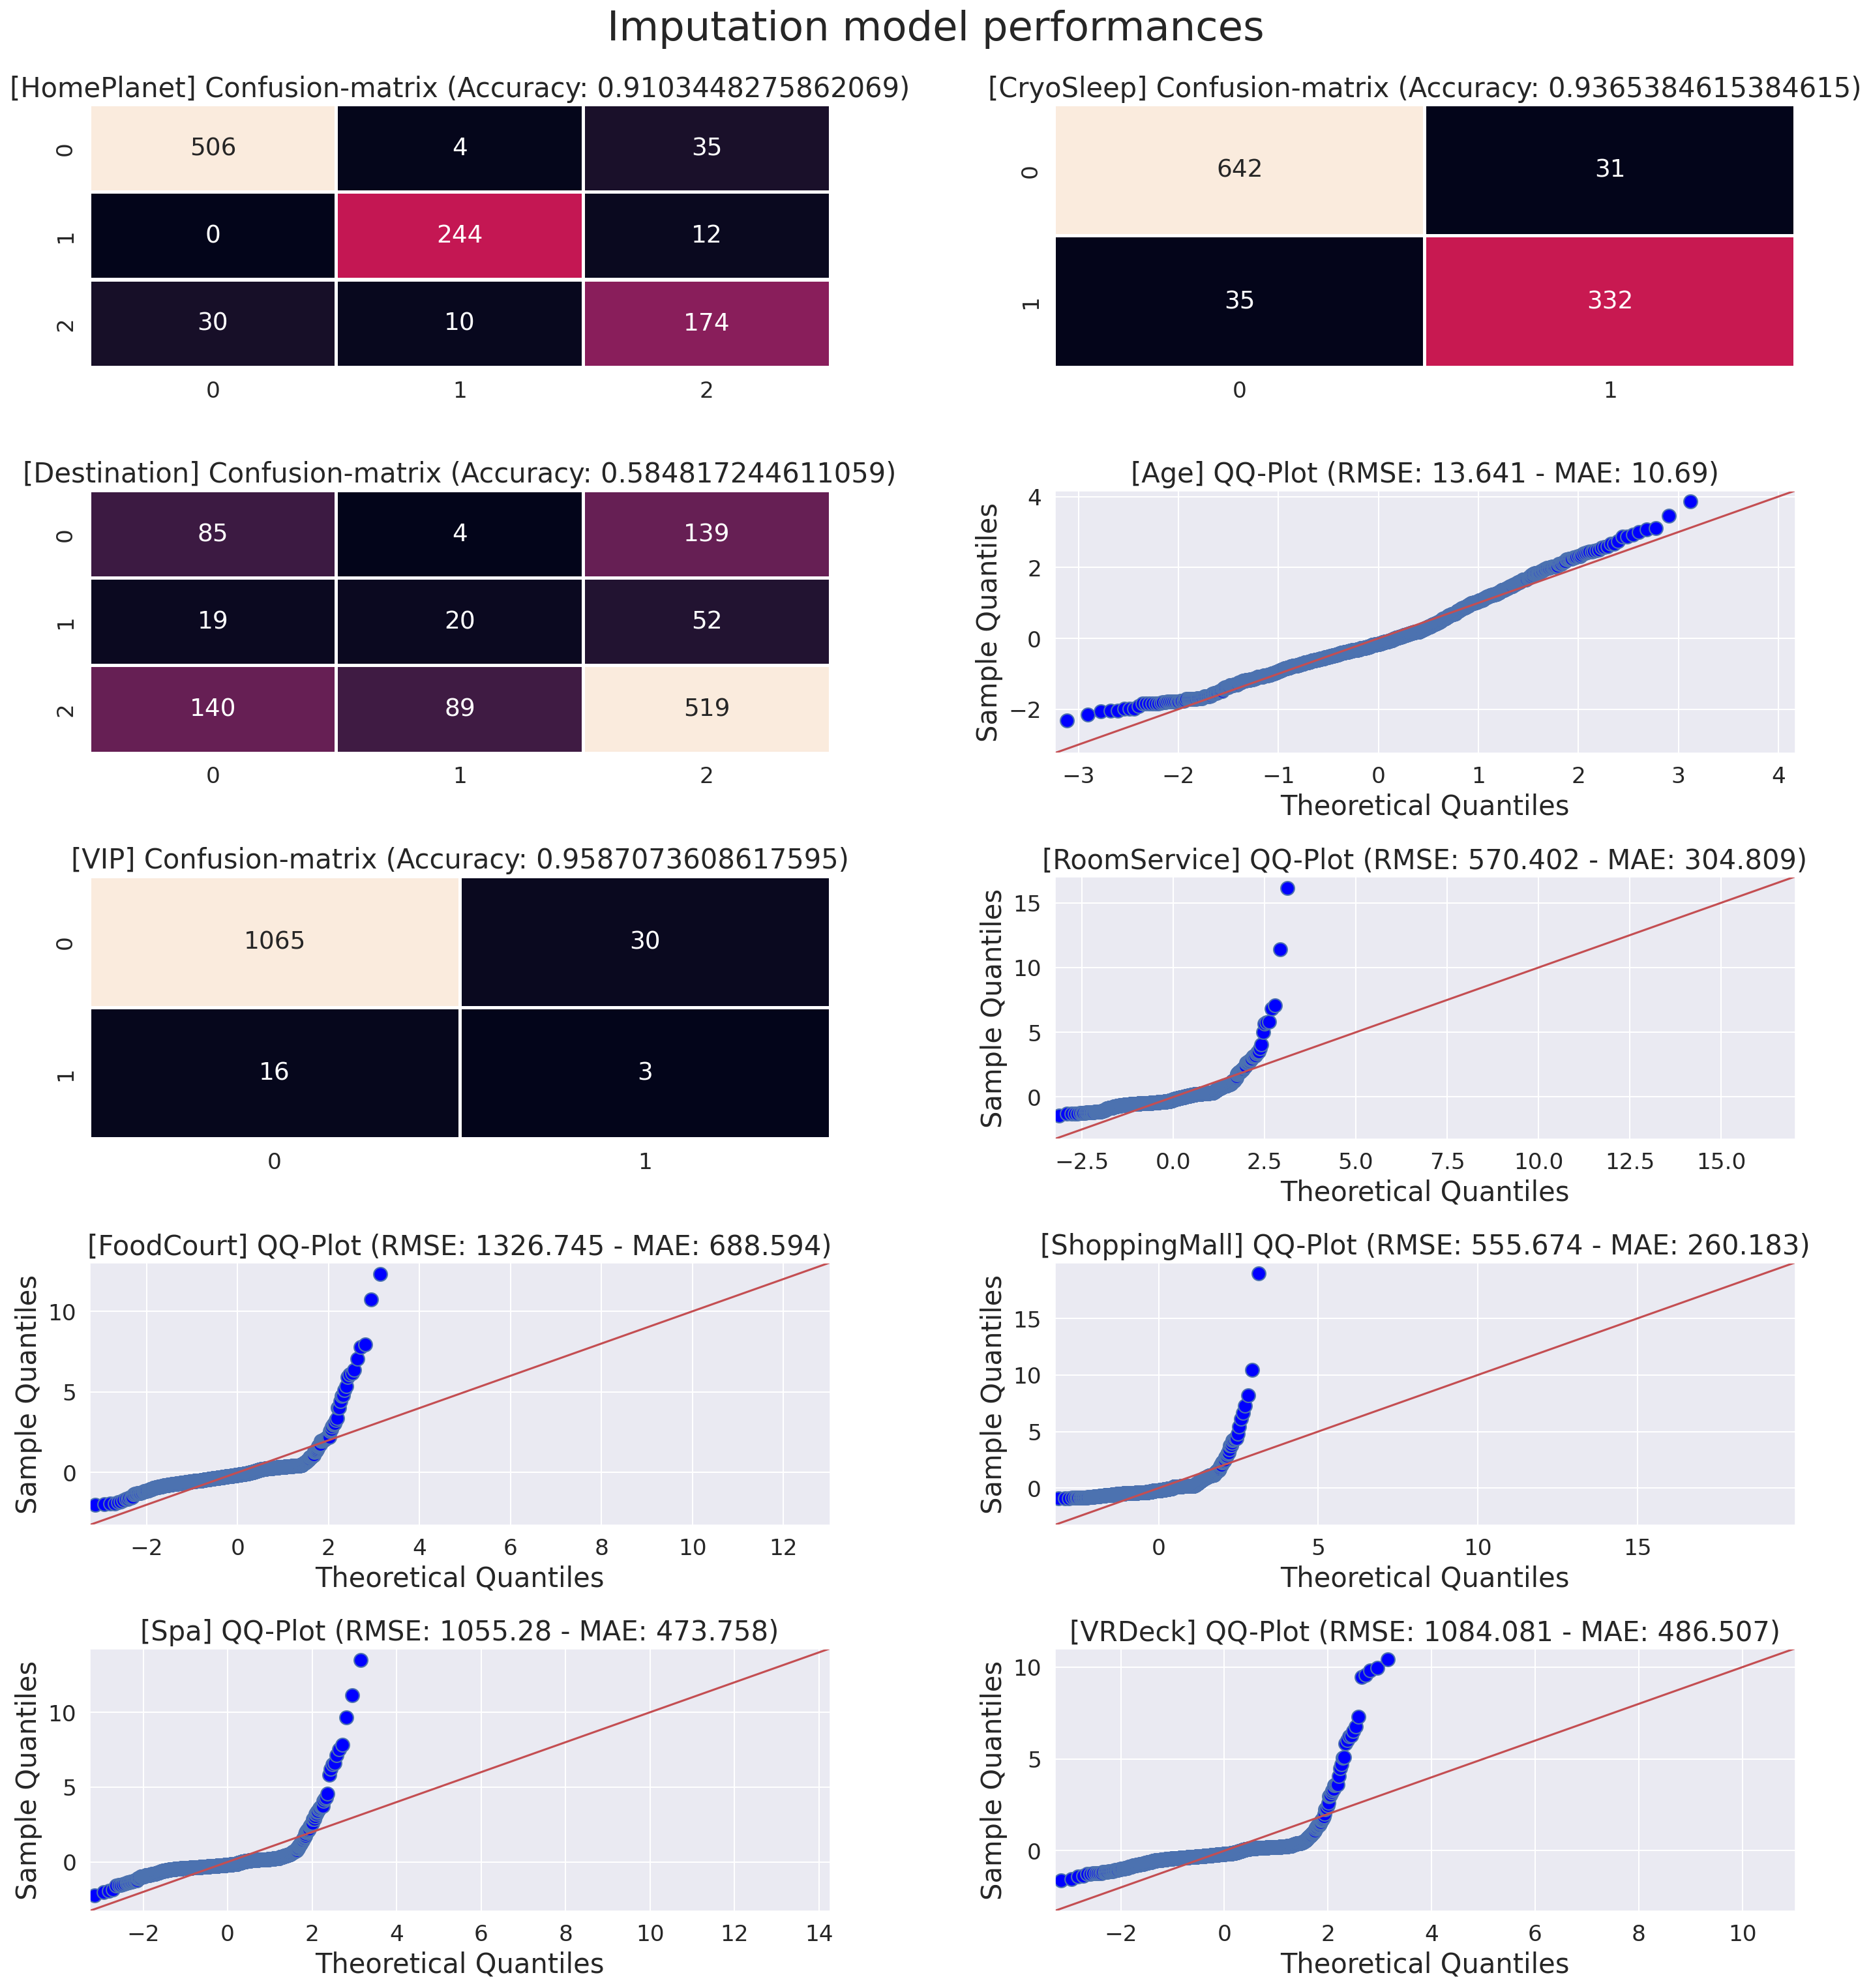

In [84]:
encoder_cols = ['HomePlanet', 'CryoSleep', 'Destination', 
          'VIP', 'Transported', 'Deck', 'Side', 'LastName']
encoders = get_encoder_dictionary(df, encoder_cols)

nROWs, nCOLs = 5, 2
sns.set(font_scale=1.5)
_,ax = plt.subplots(nrows=nROWs, ncols=nCOLs, dpi=150, figsize=(20, 20))

# Columns that we'd have to impute
cols_to_impute = [
    ('HomePlanet', 'C'), ('CryoSleep', 'C'), ('Destination', 'C'),
    ('Age', 'R'), ('VIP', 'C'), ('RoomService', 'R'), ('FoodCourt', 'R'), 
    ('ShoppingMall', 'R'), ('Spa', 'R'), ('VRDeck', 'R')
]

idx = 0
for i in range(nROWs):
    for j in range(nCOLs):
        col, type_ = cols_to_impute[idx]
        df = impute_with_model(df, col, encoders, type_, test=True, ax=ax[i][j])
        ax[i][j].title.set_fontsize(20)
        ax[i][j].xaxis.label.set_fontsize(20)
        ax[i][j].yaxis.label.set_fontsize(20)
        idx += 1

plt.suptitle('Imputation model performances', x=0.5, y=1.02, fontsize=30)
plt.tight_layout()

# Feature engineering 2 : Creating new attribute TotalSpent

In [85]:
df['TotalSpent'] = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].apply(
    lambda x: sum(x),
    axis=1
)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,Deck,Num,Side,LastName,TotalSpent
0,0001,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,B,0.0,P,Ofracculy,0.0
1,0002,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,F,0.0,S,Vines,736.0
2,0003,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,A,0.0,S,Susent,10383.0
3,0003,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,A,0.0,S,Susent,5176.0
4,0004,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,F,1.0,S,Santantines,1091.0


In [86]:
# Correlation
df.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupId,Num,TotalSpent
Age,1.000000,0.061933,0.123639,0.031116,0.117750,0.098469,-0.073909,-0.007898,-0.129014,0.179168
RoomService,0.061933,1.000000,-0.017474,0.048984,0.007979,-0.020243,-0.237761,0.001215,-0.008451,0.232596
FoodCourt,0.123639,-0.017474,1.000000,-0.011177,0.220333,0.221513,0.043825,-0.009858,-0.180012,0.742267
ShoppingMall,0.031116,0.048984,-0.011177,1.000000,0.011872,-0.006367,0.009058,0.015256,0.000168,0.219980
Spa,0.117750,0.007979,0.220333,0.011872,1.000000,0.144554,-0.213565,-0.005787,-0.127939,0.592588
VRDeck,0.098469,-0.020243,0.221513,-0.006367,0.144554,1.000000,-0.201695,0.015604,-0.136467,0.582556
Transported,-0.073909,-0.237761,0.043825,0.009058,-0.213565,-0.201695,1.000000,0.021491,-0.045097,-0.197245
GroupId,-0.007898,0.001215,-0.009858,0.015256,-0.005787,0.015604,0.021491,1.000000,0.679723,0.001873
Num,-0.129014,-0.008451,-0.180012,0.000168,-0.127939,-0.136467,-0.045097,0.679723,1.000000,-0.212093
TotalSpent,0.179168,0.232596,0.742267,0.219980,0.592588,0.582556,-0.197245,0.001873,-0.212093,1.000000


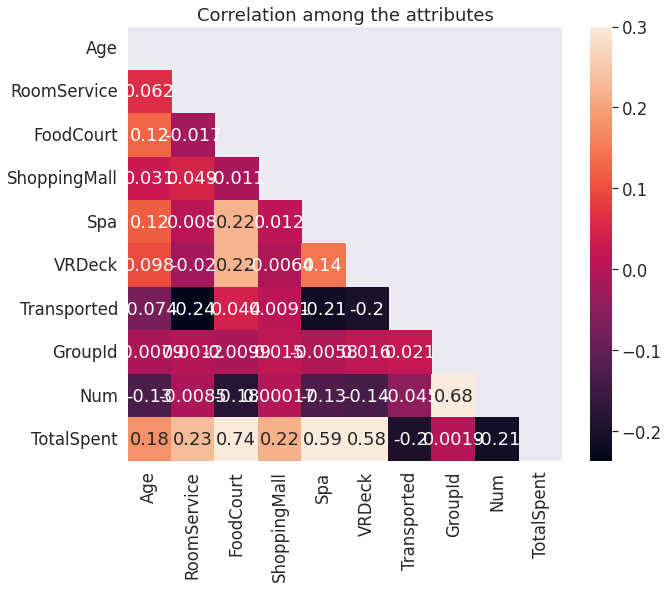

In [87]:
corr = np.corrcoef(np.random.randn(10, 10))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), square=True, linewidths=0, vmax=.3, annot=True, mask=mask)

plt.title('Correlation among the attributes')
plt.show()

In [88]:
# Predictive Modelling

from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# For creating ensemble
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold, cross_val_score

# Fixing the missing values for one final time...
strings = [
    '|#|Column|Nulls Percentage *|Type|',
    '|:|:-----|:------------------|:---|'
]
for idx, c in enumerate(df.columns, start=1):
    missing_c = df[pd.isna(df[c])]
    strings.append('|{}|{}|{}%|`{}`|'.format(
        idx, c, round((missing_c.shape[0] / num[0]) * 100, 3),
        'Continuous' if df[c].nunique() > 10 else 'Categorical'
    ))

display(Markdown('\n'.join(strings)))

|#|Column|Nulls Percentage *|Type|
|:|:-----|:------------------|:---|
|1|PassengerId|0.0%|`Continuous`|
|2|HomePlanet|0.0%|`Categorical`|
|3|CryoSleep|0.0%|`Categorical`|
|4|Cabin|2.289%|`Continuous`|
|5|Destination|0.0%|`Categorical`|
|6|Age|0.0%|`Continuous`|
|7|VIP|0.0%|`Categorical`|
|8|RoomService|0.0%|`Continuous`|
|9|FoodCourt|0.0%|`Continuous`|
|10|ShoppingMall|0.0%|`Continuous`|
|11|Spa|0.0%|`Continuous`|
|12|VRDeck|0.0%|`Continuous`|
|13|Name|2.301%|`Continuous`|
|14|Transported|0.0%|`Categorical`|
|15|GroupId|0.0%|`Continuous`|
|16|Deck|2.289%|`Categorical`|
|17|Num|2.289%|`Continuous`|
|18|Side|2.289%|`Categorical`|
|19|LastName|0.0%|`Continuous`|
|20|TotalSpent|0.0%|`Continuous`|

In [89]:
df.loc[pd.isna(df.Deck), 'Deck'] = df.Deck.mode().iloc[0]
df.loc[pd.isna(df.Num), 'Num'] = df.Num.mode().iloc[0]
df.loc[pd.isna(df.Side), 'Side'] = df.Side.mode().iloc[0]

# Data Transformation for modelling Typecasting PassengerId to integer

In [90]:
df.PassengerId = df.PassengerId.apply(lambda x: int(x))
data = df.copy(deep=True)

for column, encoder in encoders.items():
    data[column] = encoder.transform(data[column])

# Choose Dependent or Unusable
UNUSABLE = ['Cabin', 'Name', 'TotalSpent']
DEPENDENT = 'Transported'
X = data.drop(UNUSABLE+[DEPENDENT], axis=1).copy(deep=True)
y = data[DEPENDENT]



In [91]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [92]:
# Method Functions def

performances = []

def show_confusion_matrix(conf_matrix, **kwargs):
    plt.figure(figsize=(7, 7))
    sns.set(font_scale=1.7)
    sns.heatmap(conf_matrix, annot=True, cbar=False, fmt='.0f', **kwargs)
    sns.set(font_scale=1)

def getModelReport(model, X_train, y_train, X_test, y_test, msg=np.nan):

    preds = model.predict(X_test)
    accuracy = accuracy_score(preds, y_test)
    precision = precision_score(preds, y_test)
    recall = recall_score(preds, y_test)
    f1 = f1_score(preds, y_test)
    conf_matrix = confusion_matrix(preds, y_test)
    clf_report = classification_report(preds, y_test)
    model_class = model.__class__.__name__
    
    # Saving the performances
    performances.append([model_class, accuracy, f1, msg])
    
    # Creating Cross validation scores
    kfold_vc = KFold(n_splits=10, random_state=7, shuffle=True)
    results = cross_val_score(model, X_train, y_train, cv=kfold_vc)
    
    print('*'*60)
    print('{}'.format(model_class).rjust(40, ' '))
    print('*'*60)
    print('ACCURACY K-Fold:', results.mean())
    print('ACCURACY:', accuracy)
    print('F1 SCORE:', f1)
    print('CLASSIFICATION REPORT: ')
    print(clf_report)
    print('*'*60)
    
    show_confusion_matrix(conf_matrix)
    plt.title('Confusion matrix of {}'.format(model_class))
    plt.show()

# MODEL: SGD(梯度下降模型)

In [93]:
from sklearn.linear_model import SGDClassifier

sgd=SGDClassifier()
sgd.fit(X_train, y_train)

sgd_score=sgd.score(X_train, y_train)
sgd_score

0.6412136899626114

# CNN MODEL:

In [94]:
# CNN模型張量矩陣
X_train.shape

(6954, 16)

In [95]:
from tensorflow import keras

# 建立模型-->3大步驟
model = keras.Sequential([  
    #1.reshaping the input entries tensors
    keras.layers.Dense(50, input_shape=(16,), activation='relu'),  
    keras.layers.Dropout(0.5),  # avoid overfitting 

    #2.creating the hidden layers
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dropout(0.5),  # avoid overfitting 
    
    keras.layers.Dense(150,activation='relu'),
    keras.layers.Dropout(0.5),  # avoid overfitting 
   
    #3.final CNN layers
    keras.layers.Dense(1,activation='sigmoid')   
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [96]:
# Run CNN model
model.fit(X_train,y_train,epochs=100)

cnn_score = model.evaluate(X_train,y_train)[1]
cnn_score

Epoch 1/100
218/218 [==============================] - 1s 3ms/step - loss: 132.9707 - accuracy: 0.5109
Epoch 2/100
218/218 [==============================] - 1s 3ms/step - loss: 25.6959 - accuracy: 0.5486
Epoch 3/100
218/218 [==============================] - 1s 3ms/step - loss: 10.8205 - accuracy: 0.5610
Epoch 4/100
218/218 [==============================] - 1s 3ms/step - loss: 5.0972 - accuracy: 0.5779
Epoch 5/100
218/218 [==============================] - 1s 4ms/step - loss: 2.6871 - accuracy: 0.5926
Epoch 6/100
218/218 [==============================] - 1s 6ms/step - loss: 1.6742 - accuracy: 0.6073
Epoch 7/100
218/218 [==============================] - 1s 6ms/step - loss: 1.4562 - accuracy: 0.6155
Epoch 8/100
218/218 [==============================] - 1s 6ms/step - loss: 1.1640 - accuracy: 0.6057
Epoch 9/100
218/218 [==============================] - 1s 3ms/step - loss: 1.0498 - accuracy: 0.6090
Epoch 10/100
218/218 [==============================] - 1s 3ms/step - loss: 0.9034 - ac

0.7832902073860168

# MODEL: Random Forest

In [97]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
# getModelReport(rf, X_train, y_train, X_test, y_test)

rf_score=rf.score(X_train, y_train)
rf_score

0.9995685936151855

# Comparing the scores: 
## For 3 MODELs : 'Random Forest',  'Stochastic Gradient Decent',  'CNN'

In [98]:
## Score Table
models = pd.DataFrame({
             'MODELs': [            
             'Random Forest', 'Stochastic Gradient Decent', 'CNN'],

              'SCOREs': [            
              rf_score, sgd_score, cnn_score]})

models.sort_values(by='SCOREs', ascending=True)

,MODELs,SCOREs
1,Stochastic Gradient Decent,0.641214
2,CNN,0.783290
0,Random Forest,0.999569


In [99]:
# finally show
print('The Random Forest MODEL score :', rf_score)

The Random Forest MODEL score : 0.9995685936151855


# END

In [ ]:
# Submission
sample_submission.to_csv("submission.csv",index=False)

In [100]:
# https://www.kaggle.com/c/spaceship-titanic
# https://www.kaggle.com/code?searchQuery=space+titanic

# Kaggle Submission 操作步驟及流程
# https://cde566.medium.com/kaggle-submission-%E6%93%8D%E4%BD%9C%E6%AD%A5%E9%A9%9F%E5%8F%8A%E6%B5%81%E7%A8%8B-ee323ac57850